In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nehapriya94/ta2/main/TA2.csv")
#Removing the $ from Selling Price and converting it to datatype as float
df["Selling Price"] = df["Selling Price"].replace("[$,]", "", regex=True).astype(float)
df_2 = df.copy()

#Adding an additonal column to the dataframe "df_2" for calculating "Total Revenue"
df_2['Total Revenue'] = df_2['Yearly units sold in US'] * df_2['Selling Price']
display(df_2)

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US,Total Revenue
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,16041,6897630.0
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,535.0,16364,8754740.0
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,495.0,15998,7919010.0
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,540.0,16214,8755560.0
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,545.0,16343,8906935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Toshiba,60,120,1080,3.12,3.12,3.30,3.53,3.13,3.73,3.57,3.12,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1070.0,8853,9472710.0
700,Toshiba,60,240,720,2.53,3.12,3.19,3.40,2.53,3.14,3.31,3.61,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1060.0,8100,8586000.0
701,Toshiba,60,240,1080,2.51,3.15,2.84,3.49,2.84,3.34,3.72,3.39,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1150.0,8477,9748550.0
702,Toshiba,60,600,720,2.51,3.33,3.11,3.23,3.18,3.16,3.44,3.50,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1155.0,8337,9629235.0


In [ ]:
#Checking if there are any missing values in the dataset
print("\nTotal Missing values in the dataset are:  ", df_2.isna().sum().values.sum())


Total Missing values in the dataset are:   0


In [ ]:
print(df_2. columns)

Index(['Manufacturer', 'Screen Size', 'Pixel', 'Motion Rate', 'Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080', 'Selling Price',
       'Yearly units sold in US', 'Total Revenue'],
      dtype='object')


In [ ]:
y = df_2['Total Revenue']
#Regressing over dummy variables for categorical variable like Screen Size, Pixel, and Motion Rate
x = df_2[['Overall Rating',
       'Video Quality', 'Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating', 'size=26"',
       'size=32"', 'size=36"', 'size=40"', 'size=42"', 'size=46"', 'size=49"',
       'size=52"', 'size=55"', 'size=60"', 'motionrate=120', 'motionrate=240',
       'motionrate=600', 'Pixel=1080','Selling Price']]

In [ ]:
model = LinearRegression().fit(x, y)

var = x.columns.tolist()    
coef = model.coef_.tolist() 

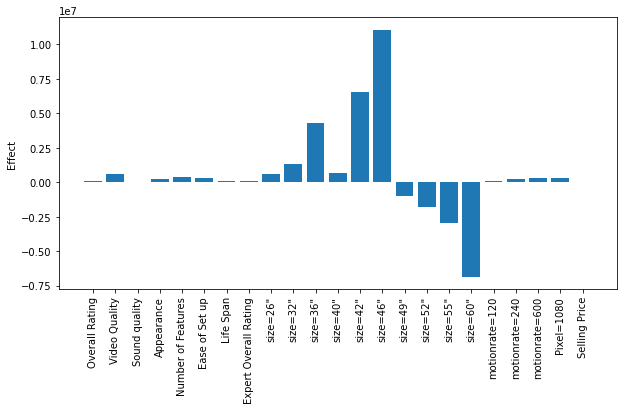

In [ ]:
#We will now analyze the impact of features on Total Revenue
plt.figure(figsize=(10, 5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
print(out)

                 Variable   Coefficient
0               Intercept -5.225650e+06
1          Overall Rating  7.439993e+04
2           Video Quality  5.627410e+05
3           Sound quality  3.556570e+04
4              Appearance  2.088464e+05
5      Number of Features  3.429122e+05
6          Ease of Set up  2.690441e+05
7               Life Span  5.621311e+04
8   Expert Overall Rating  7.271359e+04
9                size=26"  5.941529e+05
10               size=32"  1.300465e+06
11               size=36"  4.286507e+06
12               size=40"  6.398090e+05
13               size=42"  6.544469e+06
14               size=46"  1.107737e+07
15               size=49" -9.913823e+05
16               size=52" -1.767035e+06
17               size=55" -2.936798e+06
18               size=60" -6.860471e+06
19         motionrate=120  9.655823e+04
20         motionrate=240  1.971204e+05
21         motionrate=600  2.967907e+05
22             Pixel=1080  3.276495e+05
23          Selling Price  1.425215e+04


In [ ]:
# We can infer from the above result that motionrate=120 has the higest positive correlation with 
# the Total Revenue of the Television and size=49" has the highest negative correlation"


,Overall Rating
Manufacturer,
Sony,4.3
Samsung,4.2
Panasonic,3.9
Philips,3.8
LG,3.5
Sharp,3.4
Vizio,3.2
Toshiba,3.2


Text(0.5, 1.0, 'Performance among brands based on Overall Rating')

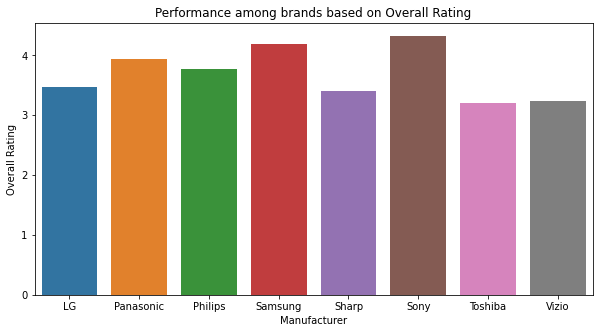

In [ ]:
#We will now view performace of the different manufacturers in terms of "Overall Rating"
manufacturer_performance1 = pd.pivot_table(df_2, index=['Manufacturer'],values=['Overall Rating'], aggfunc=np.mean)
display(manufacturer_performance1.sort_values('Overall Rating', ascending=0).style.format("{:.2}"))
manufacturer_performance1_df = manufacturer_performance1.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x = 'Manufacturer', y = 'Overall Rating',data = manufacturer_performance1_df).set_title("Performance among brands based on Overall Rating")

,Total Revenue
Manufacturer,
Samsung,1.442511e+09
Sony,1.441587e+09
Panasonic,1.360660e+09
LG,1.249450e+09
Philips,1.165514e+09
Sharp,1.141418e+09
Toshiba,1.121015e+09
Vizio,1.079401e+09


Text(0.5, 1.0, 'Performance among brands based on Total Revenue')

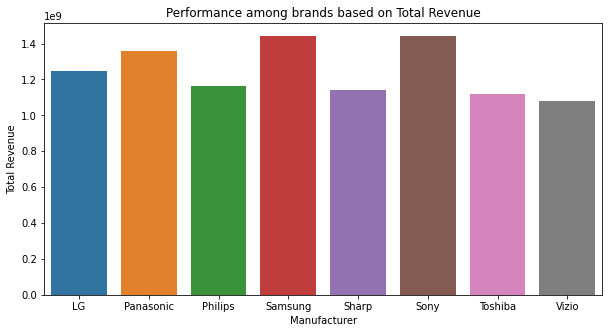

In [ ]:
#We will now view performace of the different manufacturers in terms of "Total Revenue"
manufacturer_performance2 = pd.pivot_table(df_2, index=['Manufacturer'],values=['Total Revenue'], aggfunc='sum')
display(manufacturer_performance2.sort_values('Total Revenue', ascending=0))
manufacturer_performance2_df = manufacturer_performance2.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x = 'Manufacturer', y = 'Total Revenue',data = manufacturer_performance2_df).set_title("Performance among brands based on Total Revenue")

In [ ]:
#From the above pivot tables we can infer that Sony is leading followed by Samsung and then Panasonicn in Overall Rating and Samsung followed by Sony and then Panasonic in Total Revenue. We can thus conclude that Sony and Samsung are Panasonic's biggest Competitors 

,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating
Manufacturer,,,,,,,
LG,3.4,4.2,4.0,4.2,3.6,3.1,3.7
Panasonic,4.4,3.5,3.6,3.8,4.2,4.6,4.2
Philips,3.4,3.9,4.0,2.9,3.2,3.6,3.4
Samsung,4.1,4.2,4.2,4.4,3.9,4.5,4.1
Sharp,3.6,3.6,3.5,3.4,3.2,3.4,3.2
Sony,3.9,4.1,4.0,3.2,3.7,4.1,4.5
Toshiba,3.1,3.1,3.5,3.4,3.4,3.5,3.4
Vizio,3.1,3.0,3.1,3.2,3.4,3.5,3.2


Text(0.5, 1.0, 'Overall Customer Satisfaction across Features')

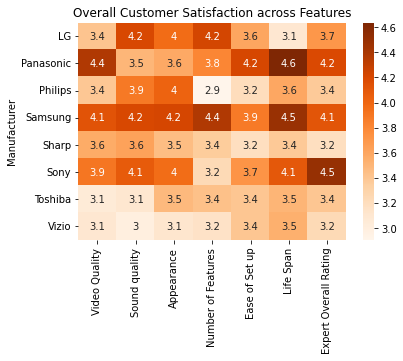

In [ ]:
#Now we will try to figure out where does the Manufacturer stand in each feature (each user rating category

Video_Quality = pd.pivot_table(df_2, index=['Manufacturer'],values=['Video Quality'], aggfunc=np.mean)
Sound_Quality = pd.pivot_table(df_2, index=['Manufacturer'],values=['Sound quality'], aggfunc=np.mean)
Appearancey = pd.pivot_table(df_2, index=['Manufacturer'],values=['Appearance'], aggfunc=np.mean)
Number_Features = pd.pivot_table(df_2, index=['Manufacturer'],values=['Number of Features'], aggfunc=np.mean)
Ease_Setup = pd.pivot_table(df_2, index=['Manufacturer'],values=['Ease of Set up'], aggfunc=np.mean)
Life_Span = pd.pivot_table(df_2, index=['Manufacturer'],values=['Life Span'], aggfunc=np.mean)
Expert_OverallRating = pd.pivot_table(df_2, index=['Manufacturer'],values=['Expert Overall Rating'], aggfunc=np.mean)
perform = pd.concat([Video_Quality, Sound_Quality, Appearancey, Number_Features, Ease_Setup, Life_Span, Expert_OverallRating], axis = 1)
display(perform.style.format("{:.2}"))
display(sns.heatmap(perform, annot=True, cmap='Oranges').set_title('Overall Customer Satisfaction across Features'))


Text(0.5, 1.0, 'Video Quality Comparison among brands')

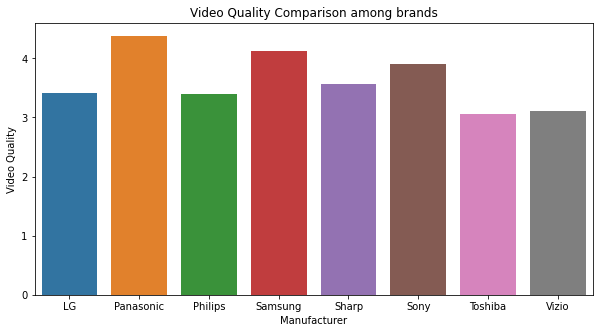

In [ ]:
#converting pivot table into a dataframe
perform_df = perform.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x = 'Manufacturer', y = 'Video Quality',data = perform_df).set_title("Video Quality Comparison among brands")

,Yearly units sold in US
Manufacturer,
LG,1517517
Panasonic,1568096
Philips,1469911
Samsung,1572232
Sharp,1483885
Sony,1491675
Toshiba,1463192
Vizio,1456445


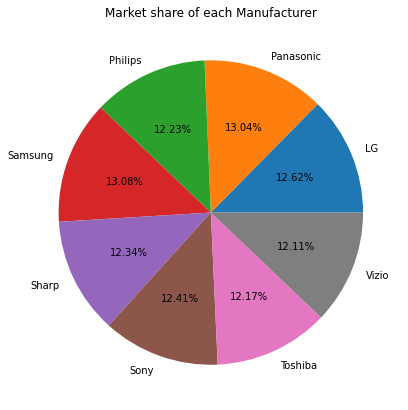

In [ ]:
#analyzing the maket demand for the televisions sold for each brand
sold= pd.pivot_table(df, index=['Manufacturer'],values=['Yearly units sold in US'], aggfunc='sum')
display(sold)
df_sold = sold.reset_index()

#creating a pie chart for demand
brand = df_sold['Manufacturer']
 
demand = df_sold['Yearly units sold in US']
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(demand, labels = brand,autopct='%.2f%%')
plt.title("Market share of each Manufacturer")
 
# show plot
plt.show()


,Yearly units sold in US
Screen Size,
19,1021466
26,1075873
32,1129187
36,1371727
40,1038733
42,1476428
46,1754862
49,912856
52,859556


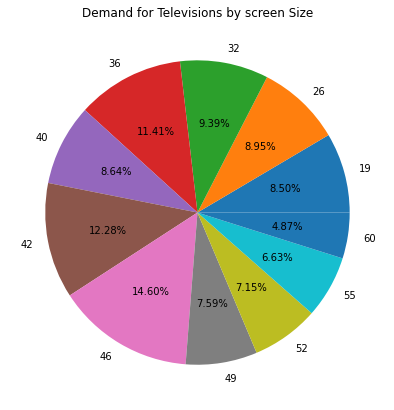

In [ ]:
#analyzing the maket demand for the televisions by Screen size
sold= pd.pivot_table(df, index=['Screen Size'],values=['Yearly units sold in US'], aggfunc='sum')
display(sold)
df_sold = sold.reset_index()

#creating a pie chart for demand
screen_size = df_sold['Screen Size'] 
 
demand = df_sold['Yearly units sold in US']
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(demand, labels = screen_size,autopct='%.2f%%')
plt.title('Demand for Televisions by screen Size')
 
# show plot
plt.show()

,Appearance,Ease of Set up,Expert Overall Rating,Life Span,Number of Features,Sound quality,Video Quality
Manufacturer,,,,,,,
LG,4.0,3.6,3.7,3.1,4.2,4.2,3.4
Panasonic,3.6,4.1,4.2,4.6,3.7,3.5,4.4
Philips,4.2,3.2,3.4,3.6,2.8,3.9,3.4
Samsung,4.2,3.9,4.1,4.5,4.4,4.2,4.2
Sharp,3.5,3.2,3.1,3.4,3.4,3.5,3.6
Sony,4.0,3.7,4.5,4.1,3.3,4.1,3.9
Toshiba,3.5,3.3,3.3,3.5,3.4,3.1,3.1
Vizio,3.1,3.4,3.2,3.6,3.1,3.0,3.1


Text(0.5, 1.0, 'Customer Satisfaction across Features for Screen Sizes 42,46,60')

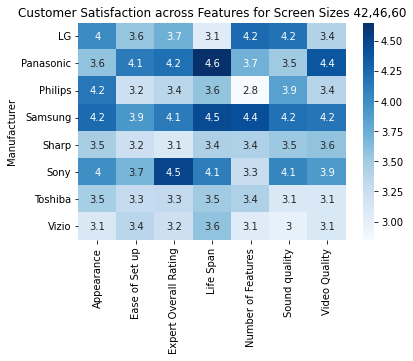

In [ ]:
#Feature comparison for the most important tv sizes (42,46 and 60)

spec = pd.pivot_table(df_2.loc[df_2['Screen Size'].isin([42,46,60]),:], index=['Manufacturer'],values=['Video Quality','Sound quality', 'Appearance', 'Number of Features',
       'Ease of Set up', 'Life Span', 'Expert Overall Rating'], aggfunc=np.mean)

display(spec.style.format("{:.2}"))
display(sns.heatmap(spec, annot=True, cmap='Blues').set_title('Customer Satisfaction across Features for Screen Sizes 42,46,60'))

Selling Price
Manufacturer Screen Size Pixel Motion Rate               
LG           19          60    720                  430.0
                               1080                 535.0
                         120   720                  495.0
                               1080                 540.0
                         240   720                  545.0
...                                                   ...
Vizio        60          120   1080                1060.0
                         240   720                 1050.0
                               1080                1125.0
                         600   720                 1115.0
                               1080                1175.0

[704 rows x 1 columns]

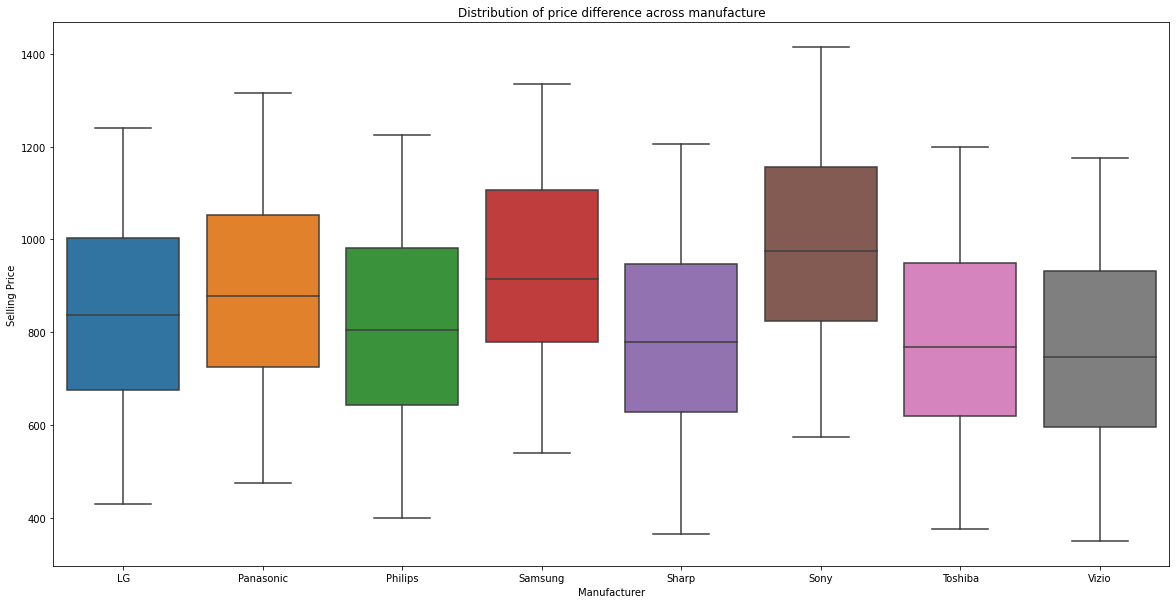

In [ ]:
#(Optional, for extra credit)
competition_price = pd.pivot_table(df, index=['Manufacturer', 'Screen Size', 'Pixel', 'Motion Rate'],values=['Selling Price'], aggfunc=np.mean)
display(competition_price)
df_pricediff = competition_price.reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x="Manufacturer", y="Selling Price", data=df_pricediff).set_title('Distribution of price difference across manufacture')